Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [3]:
import pandas as pd
df1 = pd.read_csv("pubs_info.csv")
df2 = pd.read_csv("station_details.csv")
df3 = pd.read_csv("yelp_results.csv")

In [4]:
merged_df= pd.merge(df1, df2, on='Station')
merged_df = pd.merge(merged_df, df3, on="Station")
print(merged_df)

              Station              Name_x                          Location_x  \
0        GEORGES LANE           Delaney's                      83 Nth King st   
1        GEORGES LANE     The Cobblestone                    77 North King St   
2        GEORGES LANE         Walsh's Pub                      6 Stoneybatter   
3        GEORGES LANE     Oscars Café Bar                 6 Smithfield Square   
4        GEORGES LANE  L. Mulligan Grocer                     18 Stoneybatter   
..                ...                 ...                                 ...   
65   KILLARNEY STREET             Cusacks                 145 North Strand Rd   
66  MOLESWORTH STREET    Peruke & Periwig                        31 Dawson St   
67        MOUNT BROWN      J.K. Stoutmans  130 James Street Dublin 8 D08 E6p6   
68        MOUNT BROWN          Ryan's Pub                      117 James's St   
69      CLARENDON ROW             Bar Rua                     32 Clarendon St   

       Open Status   Latitu

In [103]:
merged_df.dtypes

Station          object
Name_x           object
Location_x       object
Open Status      object
Latitude        float64
Longitude       float64
Free Bikes_x      int64
Name_y           object
Location_y       object
Free Bikes_y      int64
Rating          float64
Review Count      int64
Price            object
dtype: object

Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Review Count', ylabel='Count'>

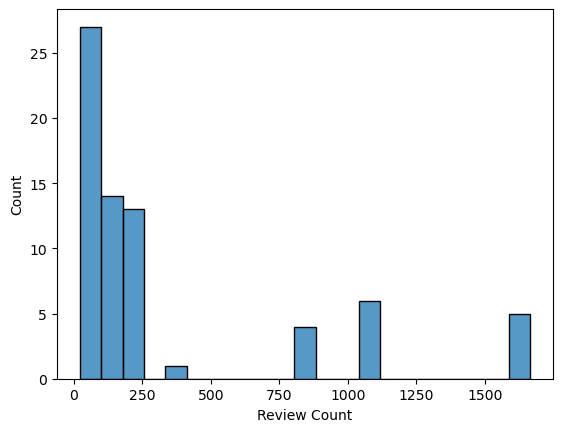

In [18]:
merged_df['Review Count'].describe()
sns.histplot(merged_df['Review Count'])

From this data we can see that a majority of the pubs with reviews have less than 250 yelp reviews. 

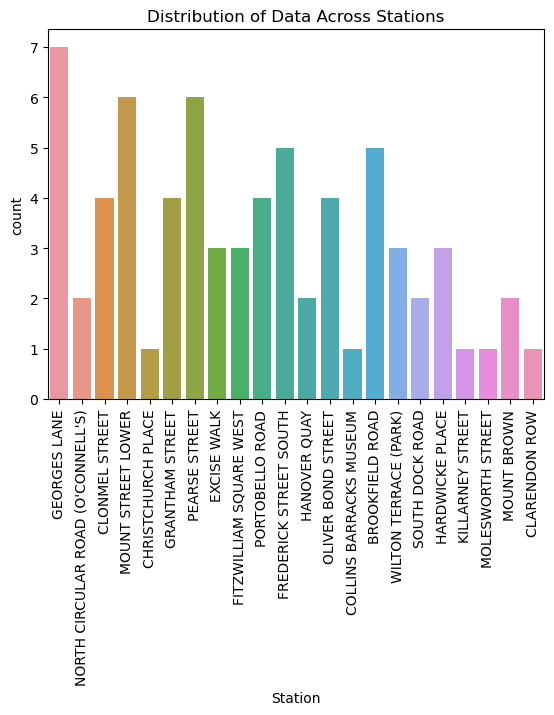

In [45]:
sns.countplot(data=merged_df, x='Station')
plt.title('Distribution of Data Across Stations')
plt.xticks(rotation=90)  
plt.show()

From this graph we see that Georges Lane has the highest count of data distribution, however a majority of the stations are close together and since the data is not duplicated for each stop this makes sense since Georges lane it outside of the bubble of majority. 

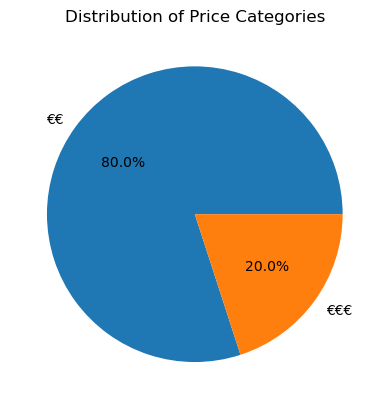

In [41]:
price_counts = merged_df['Price'].value_counts()
plt.pie(price_counts, labels=price_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Price Categories')
plt.show()

From the pie chart above we can see that the majority of the pubs located near the bike stations are moderately expensive. 

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [99]:
import sqlite3
from sqlite3 import Error

def create_connection(path):
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

# Save DataFrame to SQLite table
merged_df.to_sql("pubs_table", con=create_connection('pub.db'), if_exists='replace', index=False)


Connection to SQLite DB successful


70

Look at the data before and after the join to validate your data.

In [101]:
print(merged_df)

              Station              Name_x                          Location_x  \
0        GEORGES LANE           Delaney's                      83 Nth King st   
1        GEORGES LANE     The Cobblestone                    77 North King St   
2        GEORGES LANE         Walsh's Pub                      6 Stoneybatter   
3        GEORGES LANE     Oscars Café Bar                 6 Smithfield Square   
4        GEORGES LANE  L. Mulligan Grocer                     18 Stoneybatter   
..                ...                 ...                                 ...   
65   KILLARNEY STREET             Cusacks                 145 North Strand Rd   
66  MOLESWORTH STREET    Peruke & Periwig                        31 Dawson St   
67        MOUNT BROWN      J.K. Stoutmans  130 James Street Dublin 8 D08 E6p6   
68        MOUNT BROWN          Ryan's Pub                      117 James's St   
69      CLARENDON ROW             Bar Rua                     32 Clarendon St   

       Open Status   Latitu

In [102]:
def execute_query(connection, query):
    result = None
    try:
        cursor = connection.cursor()
        cursor.execute(query)
        result = cursor.fetchall()
        return result
    except Error as e:
        print(f"The error '{e}' occurred")

# SELECT query
select_query = "SELECT * FROM pubs_table LIMIT 10;"

# Execute query/print results
results = execute_query(create_connection('pub.db'), select_query)

# Check if get results back/print them
if results:
    for row in results:
        print(row)
else:
    print("No rows found in the database.")


Connection to SQLite DB successful
('GEORGES LANE', "Delaney's", '83 Nth King st', 'VeryLikelyOpen', 53.35023, -6.279696, 4, 'L Mulligan Grocer', "{'Address': '18 Stoneybatter', 'City': 'Dublin', 'State': 'D'}", 4, 4.5, 203, '€€')
('GEORGES LANE', 'The Cobblestone', '77 North King St', 'VeryLikelyOpen', 53.35023, -6.279696, 4, 'L Mulligan Grocer', "{'Address': '18 Stoneybatter', 'City': 'Dublin', 'State': 'D'}", 4, 4.5, 203, '€€')
('GEORGES LANE', "Walsh's Pub", '6 Stoneybatter', 'VeryLikelyOpen', 53.35023, -6.279696, 4, 'L Mulligan Grocer', "{'Address': '18 Stoneybatter', 'City': 'Dublin', 'State': 'D'}", 4, 4.5, 203, '€€')
('GEORGES LANE', 'Oscars Café Bar', '6 Smithfield Square', 'VeryLikelyOpen', 53.35023, -6.279696, 4, 'L Mulligan Grocer', "{'Address': '18 Stoneybatter', 'City': 'Dublin', 'State': 'D'}", 4, 4.5, 203, '€€')
('GEORGES LANE', 'L. Mulligan Grocer', '18 Stoneybatter', 'VeryLikelyOpen', 53.35023, -6.279696, 4, 'L Mulligan Grocer', "{'Address': '18 Stoneybatter', 'City':